### Klasifikasi Penyakit Jantung pada Individu Menggunakan Algoritma Decision Tree

Nama     : Dhea Sabilla 
Nim      : A11.2022.14102
Kelompok : Data Mining A11.4519

### Deskripsi Singkat (Ringkasan BU / DU)
Penyakit jantung merupakan salah satu penyebab kematian utama di dunia, dan deteksi dini
terhadap faktor risiko dapat menyelamatkan banyak nyawa. Penelitian ini bertujuan untuk
mengembangkan model klasifikasi berbasis machine learning, khususnya algoritma Decision Tree,
untuk membantu mengidentifikasi individu yang berisiko tinggi mengidap penyakit jantung
berdasarkan data medis dan demografis. Algoritma Decision Tree dikenal efektif untuk klasifikasi, sehingga cocok untuk membangun sistem yang akurat dan efisien.

### Masalah dan Tujuan yang Ingin Dicapai
- Masalah :
1. Bagaimana algoritma Support Vector Machine dapat membantu mengidentifikasi individu
yang berisiko mengidap penyakit jantung dengan tingkat akurasi yang memadai
berdasarkan data medis seperti tekanan darah, kadar kolesterol, dan riwayat penyakit
lainnya.
2. Bagaimana algoritma Decision Tree dapat membantu mengidentifikasi individu yang
berisiko mengidap penyakit jantung dengan tingkat akurasi yang memadai berdasarkan
data medis seperti tekanan darah, kadar kolesterol, dan riwayat penyakit lainnya.
3. Bagaimana algoritma Regresi Logistik dapat membantu mengidentifikasi individu yang
berisiko mengidap penyakit jantung dengan tingkat akurasi yang memadai berdasarkan
data medis seperti tekanan darah, kadar kolesterol, dan riwayat penyakit lainnya.

- Tujuan :
Mengembangkan model prediksi untuk klasifikasi risiko penyakit jantung menggunakan
algoritma Support Vector Machine, Decision Tree, Regresi Logistik, serta mengevaluasi
efektivitasnya dengan metrik seperti akurasi, presisi, dan recall.

### Alur / Tahapan / Kerangka Eksperimen
1. Data Collection (Pengumpulan Data)
Mengumpulkan data dari berbagai sumber yang relevan. Data ini akan digunakan untuk
melatih dan menguji model.
2. Data Preparation (Persiapan Data)
Tahap ini melibatkan pembersihan data, transformasi data, dan penanganan masalah seperti
data yang hilang atau data outlier. Persiapan data yang baik memastikan bahwa data siap
digunakan dalam proses pelatihan model.
3. Feature Engineering (Rekayasa Fitur)
Proses ini melibatkan pembuatan fitur-fitur baru atau modifikasi fitur yang ada untuk
membantu model machine learning belajar lebih efektif. Rekayasa fitur dapat meningkatkan
kinerja model dengan mengoptimalkan informasi yang dimasukkan.
4. Model Training (Pelatihan Model)
Pada tahap ini, model machine learning dilatih menggunakan data yang telah dipersiapkan.
Proses ini melibatkan pemilihan algoritma yang sesuai dan penyesuaian parameter model.
5. Model Evaluation (Evaluasi Model)
Setelah model dilatih, evaluasi dilakukan untuk menilai kinerjanya dengan menggunakan
metrik evaluasi yang sesuai, seperti akurasi, presisi, recall, atau F1-score. Hal ini membantu
menentukan seberapa baik model dalam memprediksi data yang belum pernah dilihat.
6. Model Deployment (Penerapan Model)
Tahap akhir adalah menerapkan model yang sudah dievaluasi ke dalam produksi, sehingga
dapat digunakan untuk membuat prediksi atau menjalankan tugas secara real-time atau
batch.
7. Model Optimization Through Machine Learning Operations (MLOps)
Istilah ini merujuk pada penggunaan praktik dan alat MLOps untuk mengotomatiskan,
mengatur, dan mengoptimalkan alur kerja machine learning. MLOps memungkinkan
kolaborasi yang lebih baik antara tim data scientist dan engineer, serta memfasilitasi
pemantauan dan pemeliharaan model setelah di-deploy.

### Import Libary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

### Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Info Atribut dalam Dataset Info Atribut dalam Dataset :
1. age = Usia
2. sex = Jenis kelamin
3. cp = Jenis nyeri dada (4 nilai) = Rentang 0 - 3 seberapa nyeri dada pasien
4. trestbps = Tekanan darah saat istirahat (Satuan dalam mmHg )
5. chol = Kadar Kolestrol serum dalam mg/dl
6. fbs = Gula darah puasa > 120 mg/dl ? (1 = Ya, 0 = Tidak)
7. restecg = Hasil elektrokardiografi setelah istirahat (nilai 0,1,2)
8. thalach = Detak jantung maksimum yang dicapai
9. exang = Mengalami angin setelah berolahraga? (1= Ya, 0 = Tidak)
10. oldpeak = Depresi Segmen ST yang disbebakan oleh olahraga relatif terhadap istirahat
11. slope = Gradien/Kemiringan Segmen ST
12. ca = Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi
13. thal = Penyakit Menurun/Genetik Thalasemia : 1 = normal; 2 = cacat ; 3 = cacat yang dapat diperbaiki(carrier)
14. target = 1(Ada Penyakit Jantung) / 0(Tidak Ada Penyakit Jantung)

### Exploratory Data Analysis (EDA)

### Ringkasan Informasi Dataset

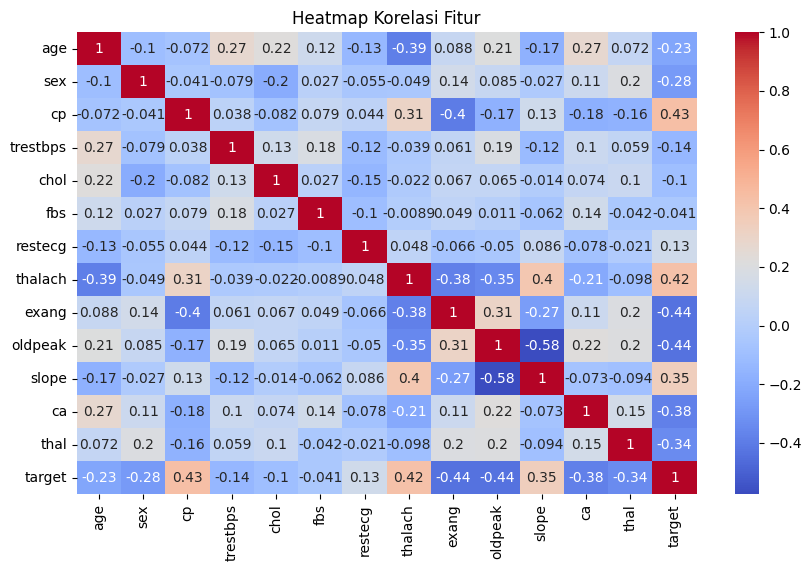

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

### Penjelasan Korelasi untuk Variabel Penting
1. Hubungan dengan target (Diagnosis Penyakit Jantung):
   - cp (Chest Pain): Korelasi positif (0.43), menunjukkan bahwa jenis nyeri dada berkaitan dengan penyakit jantung.
   - thalach (Max Heart Rate): Korelasi positif (0.42), menunjukkan bahwa denyut jantung maksimum lebih tinggi pada pasien dengan penyakit jantung.
   - exang (Exercise-Induced Angina): Korelasi negatif (-0.44), menunjukkan bahwa angina akibat olahraga lebih sering tidak terjadi pada pasien dengan       penyakit jantung.
   - oldpeak dan ca memiliki korelasi negatif sedang terhadap target, masing-masing -0.44 dan -0.38.
  
2. Hubungan Antar Variabel:
   - thalach vs age: Korelasi negatif (-0.39), artinya denyut jantung maksimum cenderung lebih rendah pada pasien yang lebih tua.
   - oldpeak vs slope: Korelasi negatif kuat (-0.58), menunjukkan hubungan terbalik antara depresi ST dan kemiringan segmen ST.
   - cp vs exang: Korelasi negatif (-0.4), artinya jenis nyeri dada tertentu lebih sering terjadi tanpa angina akibat olahraga.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Processing Data

In [5]:
X = df.drop(columns=['target'])
Y = df['target']

### Menormalisasi Data

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

### Model Training & Model Evaluation

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
# Menggunakan metode fit untuk melatih model pada data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

### Uji dan Evaluasi Model Decision Tree

In [9]:
# Melakukan prediksi pada data testing
dt_predicted = dt.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
# Menghitung akurasi model
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\n")
# Menampilkan akurasi model
print("Nilai Akurasi untuk model DecisionTreeClassifier:", dt_acc_score * 100, '%\n')
# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[95  3]
 [ 8 99]]


Nilai Akurasi untuk model DecisionTreeClassifier: 94.6341463414634 %

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



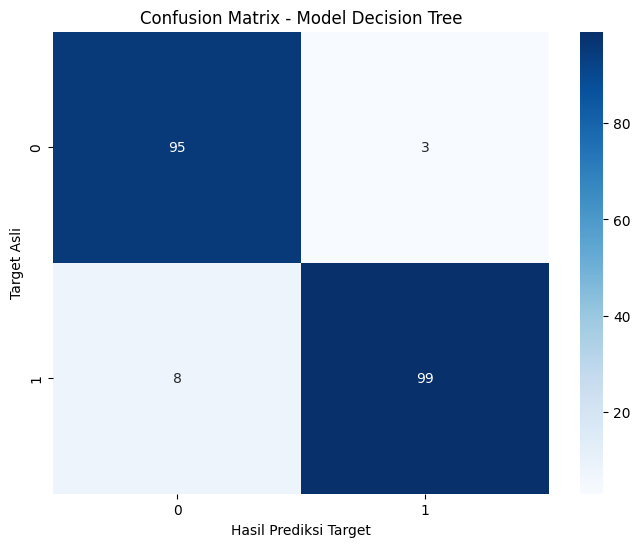

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

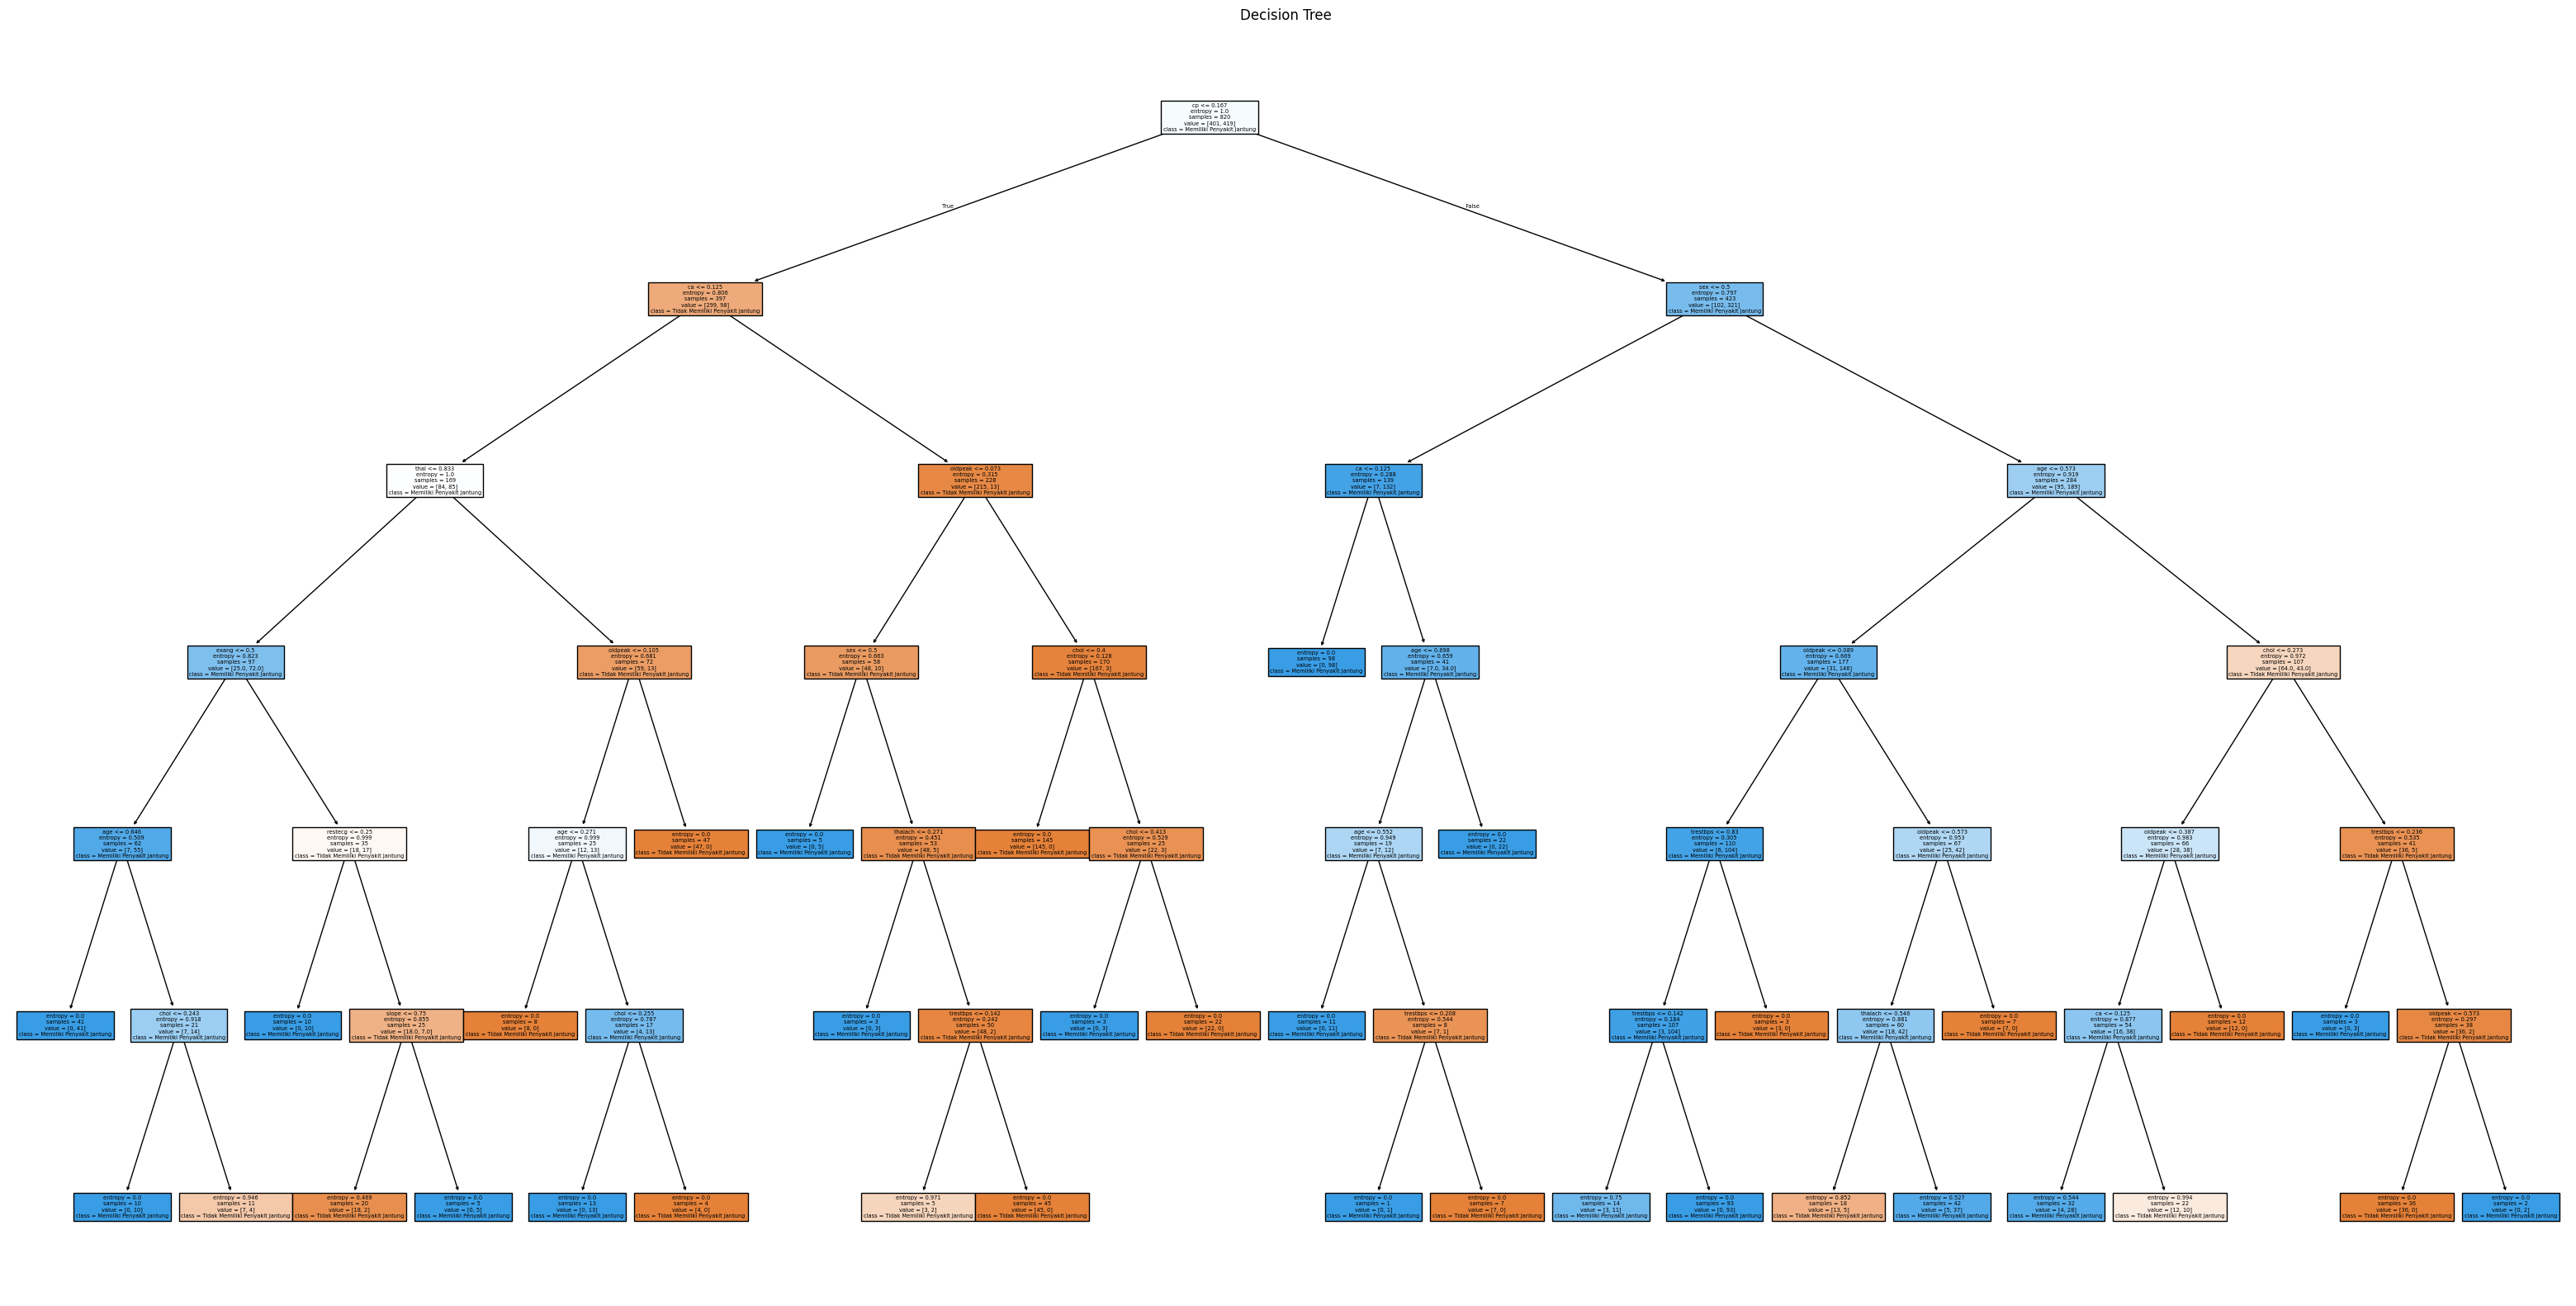

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Tidak Memiliki Penyakit Jantung', 'Memiliki Penyakit Jantung'])
plt.title('Decision Tree ')
plt.show()

In [12]:
import pickle

# Specify the path to save the model
model_path = 'decision_tree_model.pkl'

# Save the model
with open(model_path, 'wb') as file:
    pickle.dump(dt, file)